# Week 10 - PCA and Dimension Reduction Homework
Execute the below code and answer the following questions. __Do NOT commit the csv file!__

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

def generate_data():
    x, y = make_classification(n_samples=1500,
                            n_features = 20,
                            n_informative = 8,
                            n_redundant = 5,
                            n_repeated = 1,
                            n_classes = 3,
                            weights = (0.5, 0.25, 0.25),
                            random_state = 120
                            )
    colNames = ['var'+str(x) for x in range(20)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=colNames)
#     df.to_csv('pca-dataset.csv', index=False)
    return df

df = generate_data()

In [38]:
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,-2.882513,-3.272465,-2.520732,-1.987174,-2.073689,-3.272465,-1.237969,1.690547,-0.211314,-5.753190,...,-0.574979,-1.916275,-5.994075,-3.349615,-0.846193,2.491347,1.360958,-2.892522,-1.377561,0.0
1,0.775242,-1.015994,0.005137,0.057274,0.590205,-1.015994,1.350954,-1.493037,-0.862391,-1.986047,...,0.523760,0.399579,0.088600,0.718606,-1.112030,0.083929,0.606544,-1.376793,1.302641,2.0
2,-0.876376,0.220453,3.114224,-1.640025,1.180348,0.220453,0.465102,0.222511,0.880455,2.922315,...,-0.370516,3.585262,-2.168162,2.693429,-0.966636,1.586302,-2.821546,0.482164,0.187404,0.0
3,-2.550342,-1.968144,0.077681,-1.887719,1.864445,-1.968144,-0.527958,-0.201467,-0.532649,2.287445,...,-0.041341,2.383582,-0.417253,1.305379,-0.435123,-0.468557,0.923290,3.880050,2.676798,1.0
4,-0.454974,1.293300,0.112201,-0.589989,-1.674321,1.293300,0.487302,1.776318,0.702520,-1.024127,...,-0.452869,-0.667306,0.345364,-3.920591,-0.438296,-1.690141,0.176906,1.920142,1.474634,0.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [40]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


### Data Description
- `var1 - var19`: a feature for the data.  
- `target`: variable we wish to be able to predict, which is 1 of 3 classes.

# Question 1
- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (use `X_train`).  
- Remember to scale the data first.  
- What number of components would you recommend based on your analysis?  
- Explain your results using markdown cells.

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

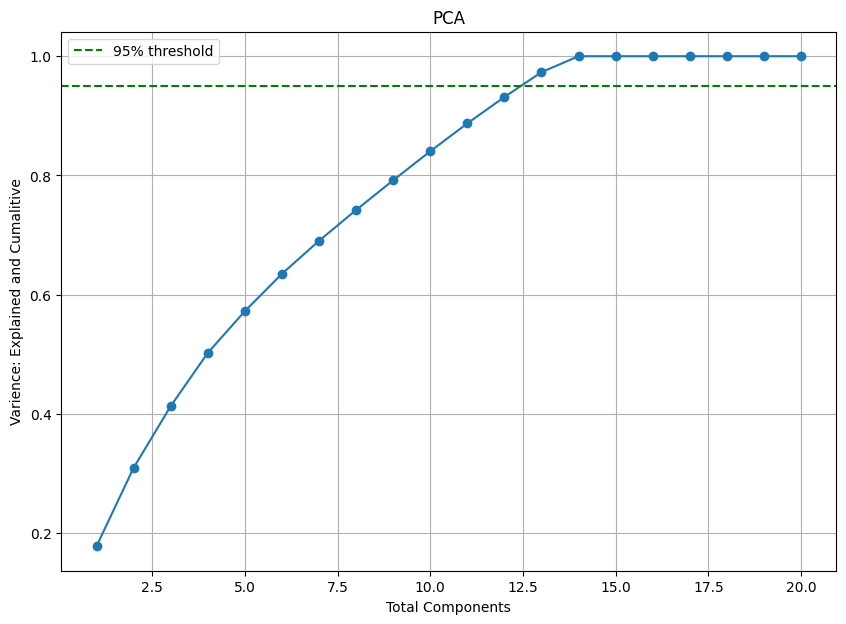


Components reachning 95% varience: 13


In [42]:
#data scaling
scale = StandardScaler()
Xtrain_scale = scale.fit_transform(X_train)

#PCA: without no of components
Pca = PCA()
Pca.fit(Xtrain_scale)

#Variance
eva_varience = Pca.explained_variance_ratio_
cum_varience = np.cumsum(eva_varience)

#Plot
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cum_varience) + 1), cum_varience, marker='o')
plt.axhline(y=0.95, color='green', linestyle='--', label='95% threshold')
plt.xlabel('Total Components')
plt.ylabel('Varience: Explained and Cumalitive')
plt.title('PCA')
plt.grid(True)
plt.legend()
plt.show()

#components reachning 95%
var_comp = np.argmax(cum_varience >= 0.95) + 1
print()
print('Components reachning 95% varience:', var_comp)


> Describe your results here

From the plot we can determine that: First we used PCA to reduce the features after data was scaled. This makes process faster and as per the results 13 components are reaching 95% variance. which is the required to retain the results.

# Question 2
- Evaluate the target variable in the `df` object.  
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell.

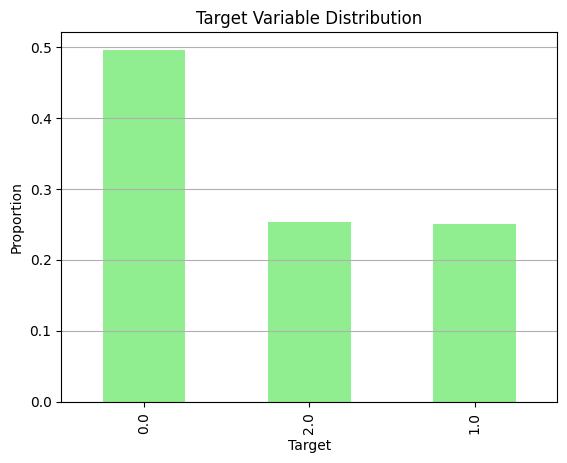

Count:
target
0.0    744
2.0    380
1.0    376
Name: count, dtype: int64

Proportion:
target
0.0    0.496000
2.0    0.253333
1.0    0.250667
Name: proportion, dtype: float64


In [43]:
#targert variable
df['target'].value_counts(normalize=True).plot(kind='bar', color='lightgreen')
plt.title('Target Variable Distribution')
plt.xlabel('Target')
plt.ylabel('Proportion')
plt.grid(axis='y')
plt.show()

print("Count:")
print(df['target'].value_counts())
print()
print("Proportion:")
print(df['target'].value_counts(normalize=True))


> Describe your results here

From Class 1, 2 and 3 we can say that class 1 is double of other two. the data is imbalanced. Accuracy can be misleading. Using F1 score will help to treat class with equality.

# Question 3
- Without using PCA, create a logistic regression model using practices discussed in class.  
- Which model would you choose? Explain your results in the markdown cells.    
- What is the accuracy, precision, and recall for the test data?  

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [45]:
#Scaling the features for LR
scale = StandardScaler()
Xtrain_scale = scale.fit_transform(X_train)
Xtest_scale = scale.transform(X_test)

#Train multinomial LR - 3 classes
lr= LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
lr.fit(Xtrain_scale, y_training)

#Predict
pred_y = lr.predict(Xtest_scale)

#Evaluate
Accuracy = accuracy_score(y_test, pred_y)
Precision = precision_score(y_test, pred_y, average='macro')
Recall = recall_score(y_test, pred_y, average='macro')

print('Accuracy:', Accuracy)
print('Precision:', Precision)
print('Recall:', Recall)
print()
#Classification
print("Classification Report:")
print(classification_report(y_test, pred_y))

Accuracy: 0.7033333333333334
Precision: 0.6855872622001655
Recall: 0.681410661265617

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.76      0.76       153
         1.0       0.68      0.59      0.63        74
         2.0       0.62      0.68      0.65        73

    accuracy                           0.70       300
   macro avg       0.69      0.68      0.68       300
weighted avg       0.70      0.70      0.70       300



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


> Describe results here

we can see the results as following

Accuracy: 70.3%

Precision: 68.5%

Recall: 68.1%

Class 1 has highest precision and recall. class 2 has low recall also low on precision and class 3 is close knit with both precision and recall. In conclusion, Logistic regression model gave 70% acurracy

# Question 4
- Use PCA within a pipeline to create a logistic regression model using best practices from class.  
- Which model performs the best on the training data? Explain your results in markdown cells.  
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

In [46]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report


In [47]:
#Pipeline with PCA(13), LR, Scaling.
pipe_line = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=12)),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42))
])

#Train pipeline
pipe_line.fit(X_train, y_training)

#Predictions: test set
pred_y = pipe_line.predict(X_test)

#Evaluate
Accuracy = accuracy_score(y_test, pred_y)
Precision = precision_score(y_test, pred_y, average='macro')
Recall = recall_score(y_test, pred_y, average='macro')

print('Accuracy:', Accuracy)
print('Precision:', Precision)
print('Recall:', Recall)
print()

print("Classification Report:")
print(classification_report(y_test,pred_y))

Accuracy: 0.7
Precision: 0.6815789473684211
Recall: 0.6721927406858913

Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.78      0.76       153
         1.0       0.66      0.57      0.61        74
         2.0       0.64      0.67      0.66        73

    accuracy                           0.70       300
   macro avg       0.68      0.67      0.68       300
weighted avg       0.70      0.70      0.70       300



> Describe your results here

after we did LR using pipeline which includes: 13 PCA components and scaling. we can see the results as following

Accuracy: 70%

Precision: 68.1%

Recall: 67.2%

here too Class 1 has highest precision and recall. class 2 and class 3 show average performance. In conclusion,acurracy remains 70% class 1 still gives better results than class 2 and 3.

# Question 5

- Without using PCA, create a decision tree model using best practices discussed in class.  
- Which model performs the best on the training data? Explain your results in the markdown cells.  
- What is the accuracy, precision, and recall for the test data?  
- Does this perform better than either of the logistic regression models?

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [49]:
# Train: Decision Tree
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train, y_training)

# Prediction: test set
DT_predy_y = DT.predict(X_test)

# Evaluate the model
DT_Accuracy = accuracy_score(y_test, DT_predy_y)
DT_Precision = precision_score(y_test, DT_predy_y, average='macro')
DT_Recall = recall_score(y_test, DT_predy_y, average='macro')

print('Accuracy:', DT_Accuracy)
print('Precision:', DT_Precision)
print('Recall:', DT_Recall)
print()

print("Classification Report:")
print(classification_report(y_test,DT_predy_y))

Accuracy: 0.6766666666666666
Precision: 0.6633805909678537
Recall: 0.6660605004682362

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73       153
         1.0       0.53      0.66      0.59        74
         2.0       0.70      0.63      0.66        73

    accuracy                           0.68       300
   macro avg       0.66      0.67      0.66       300
weighted avg       0.69      0.68      0.68       300



> Describe your results here

from decision tree model we can see the results as following

Accuracy: 67.6%

Precision: 66.3%

Recall: 66.6%

Class 1 has highest precision and recall. class 2 has high recall and low precision but compartitively to class 1 both are not giving good results and class 3 has high precision which is close to class 1 and lowest on recall. In conclusion, Decision tree model gave 68% acurracy which is low than earlier linear regression model

# Question 6
- Repeat `Question 5` but use PCA.  
- Does this perform better than the original Decision Tree or the logistic regression models?

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [51]:
# Pipeline: PCA, DT, Scaling
Pipeline_DT_PCA = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=12)),
    ('tree', DecisionTreeClassifier(random_state=42))
])

# Training
Pipeline_DT_PCA.fit(X_train, y_training)

# Prediction: test set
DT_PCA_pred_y = Pipeline_DT_PCA.predict(X_test)

# Evaluate
DT_PCA_Accuracy = accuracy_score(y_test, DT_PCA_pred_y)
DT_PCA_Precision = precision_score(y_test, DT_PCA_pred_y, average='macro')
DT_PCA_recall = recall_score(y_test, DT_PCA_pred_y, average='macro')

print('Accuracy:', DT_PCA_Accuracy)
print('Precision:', DT_PCA_Precision)
print('Recall:', DT_PCA_recall)
print()

print("Classification Report:")
print(classification_report(y_test, DT_PCA_pred_y))

Accuracy: 0.67
Precision: 0.6433916711153435
Recall: 0.6480565980968881

Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.73      0.74       153
         1.0       0.56      0.51      0.54        74
         2.0       0.63      0.70      0.66        73

    accuracy                           0.67       300
   macro avg       0.64      0.65      0.64       300
weighted avg       0.67      0.67      0.67       300



> Describe results here

after we did DT using pipeline which includes: PCA and scaling. we can see the results as following

Accuracy: 67%

Precision: 64.3%

Recall: 64.8%

here too Class 1 has highest precision and recall. class 2 has both precision and recall on lower side and class 3 has high recall when compared to class 1 and low precision. In conclusion,acurracy is 67% class 1 still gives better results than class 2 and 3. LR without PCA gives best results.